In [2]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import re 
import sys 
sys.path.append('/Users/elaineye/data_science/teochew_nlp/src/')
from pinyin_utils import extract_pinyin_tones

In [37]:
data = pd.read_csv("teochew-clean-data.txt", names=['teochew', 'word'], sep='-')

In [45]:
def replace_tilde(tones):
    tones = tones.strip() 
    return tones.replace('~', 'n')

data['teochew'] = data['teochew'].apply(replace_tilde)
data.word = data.word.apply(lambda x: x.strip())
data.head(10)

,teochew,word
0,ua52,我
1,le52,你
2,i3,他
3,eui21,会
4,da5,说
5,deo3 jiu5 wei1,潮州话
6,nang5,人
7,neng35 peng1 iu52,女朋友
8,gai5,是
9,dzeik5,一


In [66]:
# different way to split the characters
split_df = []
for ix, row in data.iterrows():
    teochew_word = row['teochew'].split()
    mandarin_word = list(row['word'])
    for teochew_char, mandarin_char in zip(teochew_word, mandarin_word):
        split_df.append(pd.Series({"teochew": teochew_char, "word": mandarin_char}))
split_df = pd.DataFrame(split_df)
split_df.head(10)

,teochew,word
0,ua52,我
1,le52,你
2,i3,他
3,eui21,会
4,da5,说
5,deo3,潮
6,jiu5,州
7,wei1,话
8,nang5,人
9,neng35,女


In [70]:
data['teochew_length'] = data.teochew.apply(lambda x: len(x.split()))
data['word_length'] = data.word.apply(lambda x: len(x))
data2 = data[data.teochew_length == data.word_length]

In [6]:
def extract_teochew_tones(input_teochew):
    return "".join([c for c in input_teochew if not c.isalpha()])

extract_teochew_tones('ua52')

'52'

In [71]:
# split the teochew/mandarin character
data3 = pd.DataFrame(data2.word.apply(lambda x: list(x)[-1]))
data4 = pd.DataFrame(data2.teochew.apply(lambda x: x.split(' ')[-1]))
data3 = data3.explode('word')
data4 = data4.explode('teochew')
data4['teochew_tone'] = data4.teochew.apply(extract_teochew_tones)
combined_data = pd.concat([data3, data4], axis=1)
combined_data.drop_duplicates(subset='word', keep='first', inplace=True)
combined_data.count() 

word            252
teochew         252
teochew_tone    252
dtype: int64

In [72]:
tones_only_list = combined_data['teochew_tone'].values.tolist()
print(tones_only_list)

['52', '52', '3', '21', '5', '1', '5', '52', '5', '5', '35', '35', '3', '1', '35', '5', '1', '21', '52', '5', '1', '52', '1', '52', '5', '35', '5', '1', '5', '21', '1', '3', '1', '35', '35', '35', '1', '35', '1', '52', '35', '35', '1', '52', '1', '5', '52', '3', '3', '5', '21', '3', '5', '21', '3', '5', '52', '5', '5', '35', '5', '3', '52', '1', '5', '1', '21', '52', '1', '1', '5', '1', '3', '52', '3', '1', '35', '1', '35', '21', '5', '1', '3', '5', '3', '35', '3', '52', '5', '1', '5', '5', '1', '52', '1', '3', '5', '35', '3', '52', '1', '35', '52', '52', '3', '3', '52', '3', '5', '1', '5', '5', '5', '5', '1', '3', '35', '5', '1', '3', '52', '3', '52', '1', '52', '3', '3', '35', '5', '5', '1', '1', '35', '5', '5', '3', '1', '3', '5', '1', '1', '52', '1', '1', '5', '3', '21', '3', '3', '3', '52', '1', '1', '35', '1', '52', '35', '5', '3', '3', '35', '5', '5', '3', '5', '1', '52', '5', '35', '52', '52', '5', '35', '35', '3', '3', '1', '21', '35', '3', '3', '21', '3', '5', '3', '3', '1', 

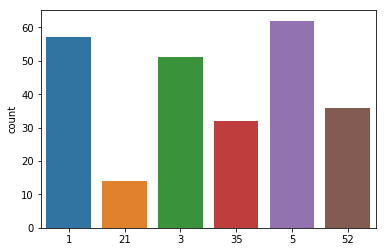

In [73]:
tones_only_list = np.array(tones_only_list) 
sns.countplot(tones_only_list)